In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, log_loss, accuracy_score
from tqdm import tqdm_notebook as TN
import seaborn as sns
import imageio
import time
from IPython.display import HTML
from sklearn.datasets import make_blobs



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
my_cmap=matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow", "green", "blue", "black"])

In [ ]:
np.random.seed(0)

In [ ]:
a=np.random.randn(100,50)
b=np.random.randn(100,50)

c=np.zeros((100,50))



In [ ]:
%%time
for i in range(100):
  for j in range(50):
    c[i,j]=a[i,j]+b[i,j]
    

CPU times: user 6.62 ms, sys: 1.11 ms, total: 7.73 ms
Wall time: 9 ms


In [ ]:
%%time
c=a+b

CPU times: user 53 µs, sys: 0 ns, total: 53 µs
Wall time: 57.9 µs


In [ ]:
data, labels=make_blobs(n_samples=2000, n_features=2, centers=6, random_state=0)

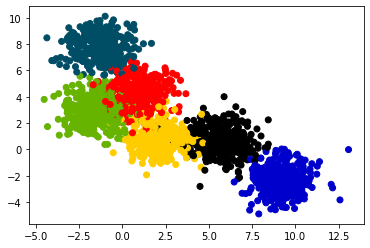

In [ ]:
plt.scatter(data[:,0],data[:,1],c=labels, cmap=my_cmap)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(data, labels, stratify=labels)

In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1500, 2) (500, 2) (1500,) (500,)


In [ ]:
enc=OneHotEncoder()
y_oh_train=enc.fit_transform(np.expand_dims(y_train,1)).toarray()
y_oh_test=enc.fit_transform(np.expand_dims(y_test,1)).toarray()


In [ ]:
print(y_oh_train,y_oh_test)

[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]] [[0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]]


In [ ]:
W1=np.random.randn(2,6)
W2=np.random.randn(6,6)
print(W1,W2)


[[ 0.85719379 -0.18267558 -0.19486467 -0.86709372 -0.04480634  0.60021352]
 [-0.91865235  0.96273565  0.21393522 -0.67961723 -0.32544215  0.26908283]] [[-1.32416455 -0.44814492 -0.82336501 -0.61212272 -0.24077625 -0.99206342]
 [-0.66705954  1.1937134   0.79379011 -0.70917885 -0.60788    -0.16363771]
 [ 1.1110824  -0.17322582  0.0340266   0.21413708  1.2052624  -2.06130236]
 [-1.49213568 -0.81949955 -0.83679697  0.67632741 -0.25963602 -0.8463474 ]
 [-0.13288623 -0.90625061  1.19029934 -1.47292164  0.34213776  0.13711231]
 [ 0.37320765  0.30457279  0.40228805 -0.06802952 -0.65595205 -0.54962836]]


In [ ]:
%%time
class SigmoidFFN_Scaler:
  def __init__(self,W1,W2):
    #layer 1
    self.w1=W1[0][0].copy()
    self.w2=W1[1][0].copy()
    self.w3=W1[0][1].copy()
    self.w4=W1[1][1].copy()
    self.w5=W1[0][2].copy()
    self.w6=W1[1][2].copy()
    self.w7=W1[0][3].copy()
    self.w8=W1[1][3].copy()
    self.b1=0
    self.b2=0
    self.b3=0
    self.b4=0
    #layer 2
    self.w9= W2[0][0].copy()
    self.w10=W2[1][0].copy()
    self.w11=W2[2][0].copy()
    self.w12=W2[3][0].copy()
    self.b5=0
    self.w13=W2[0][1].copy()
    self.w14=W2[1][1].copy()
    self.w15=W2[2][1].copy()
    self.w16=W2[3][1].copy()
    self.b6=0
    self.w17=W2[0][2].copy()
    self.w18=W2[1][2].copy()
    self.w19=W2[2][2].copy()
    self.w20=W2[3][2].copy()
    self.b7=0
    self.w21=W2[0][3].copy()
    self.w22=W2[1][3].copy()
    self.w23=W2[2][3].copy()
    self.w24=W2[3][3].copy()
    self.b8=0
    self.w25=W2[0][4].copy()
    self.w26=W2[1][4].copy()
    self.w27=W2[2][4].copy()
    self.w28=W2[3][4].copy()
    self.b9=0
    self.w29=W2[0][5].copy()
    self.w30=W2[1][5].copy()
    self.w31=W2[2][5].copy()
    self.w32=W2[3][5].copy()
    self.b10=0

  def sigmoid(self, x):
    return(1/(1+np.exp(-x)))
  
  def feed_forward(self,x):
    self.x1,self.x2=x

    #layer 1
    self.a1=self.w1*self.x1+self.w2*self.x2+self.b1
    self.h1=self.sigmoid(self.a1)

    self.a2=self.w3*self.x1+self.w4*self.x2+self.b2
    self.h2=self.sigmoid(self.a1)

    self.a3=self.w5*self.x1+self.w6*self.x2+self.b3
    self.h3=self.sigmoid(self.a1)

    self.a4=self.w7*self.x1+self.w8*self.x2+self.b4
    self.h4=self.sigmoid(self.a1)

    #layer 2


    self.a5=self.w9*self.h1+self.w10*self.h2+self.w11*self.h3+self.w12*self.h4+self.b5
    

    self.a6=self.w13*self.h1+self.w14*self.h2+self.w15*self.h3+self.w16*self.h4+self.b6
    
    
    self.a7=self.w17*self.h1+self.w18*self.h2+self.w19*self.h3+self.w20*self.h4+self.b7
    

    self.a8=self.w21*self.h1+self.w22*self.h2+self.w23*self.h3+self.w24*self.h4+self.b8
    

    self.a9=self.w15*self.h1+self.w26*self.h2+self.w27*self.h3+self.w28*self.h4+self.b9
    

    self.a10=self.w29*self.h1+self.w30*self.h2+self.w31*self.h3+self.w32*self.h4+self.b10

    sum_exp=np.sum([np.exp(self.a5),np.exp(self.a6),np.exp(self.a7),np.exp(self.a8),np.exp(self.a9),np.exp(self.a10)])

    self.h5=np.exp(self.a5)/sum_exp
    self.h6=np.exp(self.a6)/sum_exp    
    self.h7=np.exp(self.a7)/sum_exp    
    self.h8=np.exp(self.a8)/sum_exp    
    self.h9=np.exp(self.a9)/sum_exp    
    self.h10=np.exp(self.a10)/sum_exp    

    return np.array([self.h5, self.h6, self.h7, self.h8, self.h9, self.h10])

  def grad(self,x,y):
    self.feed_forward(x)
    self.y1,self.y2,self.y3,self.y4,self.y5,self.y6=y
    
    self.da5=self.h5-self.y1
    self.da6=self.h6-self.y2
    self.da7=self.h7-self.y3
    self.da8=self.h8-self.y4
    self.da9=self.h9-self.y5
    self.da10=self.h10-self.y6

    self.dw9=self.da5*self.h1
    self.dw10=self.da5*self.h2
    self.dw11=self.da5*self.h3
    self.dw12=self.da5*self.h4
    self.db5=self.da5

    self.dw13=self.da6*self.h1
    self.dw14=self.da6*self.h2
    self.dw15=self.da6*self.h3
    self.dw16=self.da6*self.h4
    self.db6=self.da6
    self.dw17=self.da7*self.h1
    self.dw18=self.da7*self.h2
    self.dw19=self.da7*self.h3
    self.dw20=self.da7*self.h4
    self.db7=self.da7
    self.dw21=self.da8*self.h1
    self.dw22=self.da8*self.h2
    self.dw23=self.da8*self.h3
    self.dw24=self.da8*self.h4
    self.db8=self.da8
    self.dw25=self.da9*self.h1
    self.dw26=self.da9*self.h2
    self.dw27=self.da9*self.h3
    self.dw28=self.da9*self.h4
    self.db9=self.da9

    self.dw29=self.da10*self.h1
    self.dw30=self.da10*self.h2
    self.dw31=self.da10*self.h3
    self.dw32=self.da10*self.h4

    self.db10=self.da10
    #layer1
    self.dh1 =self.w9*self.da5 + self.w13*self.da6 + self.w17*self.da7 + self.w21*self.da8 + self.w25*self.da9 + self.w29*self.da10
    self.dh2=self.w10*self.da5 + self.w14*self.da6 + self.w18*self.da7 + self.w22*self.da8 + self.w26*self.da9 + self.w30*self.da10
    self.dh3=self.w11*self.da5 + self.w15*self.da6 + self.w19*self.da7 + self.w23*self.da8 + self.w27*self.da9 + self.w31*self.da10
    self.dh4=self.w12*self.da5 + self.w16*self.da6 + self.w20*self.da7 + self.w24*self.da8 + self.w28*self.da9 + self.w32*self.da10
    
    self.da1=self.dh1*self.h1*(1-self.h1)
    self.da2=self.dh2*self.h2*(1-self.h2)
    self.da3=self.dh3*self.h3*(1-self.h3)
    self.da4=self.dh4*self.h4*(1-self.h4)

    self.dw1=self.x1*self.da1
    self.dw2=self.x2*self.da1
    self.dw3=self.x1*self.da2
    self.dw4=self.x2*self.da2
    self.db1=self.da1
    self.db2=self.da2
    self.dw5=self.x1*self.da3
    self.dw6=self.x2*self.da3
    self.dw7=self.x1*self.da4
    self.dw8=self.x2*self.da4
    self.db3=self.da3
    self.db4=self.da4



  def fit(self,X,Y, epochs=1, learning_rate=1, initialize=True, display_loss=True):

    if(initialize):
      self.w1=W1[0][0].copy()
      self.w2=W1[1][0].copy()
      self.w3=W1[0][1].copy()
      self.w4=W1[1][1].copy()
      self.w5=W1[0][2].copy()
      self.w6=W1[1][2].copy()
      self.w7=W1[0][3].copy()
      self.w8=W1[1][3].copy()
      self.b1=0
      self.b2=0
      self.b3=0
      self.b4=0
      #layer 2
      self.w9= W2[0][0].copy()
      self.w10=W2[1][0].copy()
      self.w11=W2[2][0].copy()
      self.w12=W2[3][0].copy()
      self.b5=0
      self.w13=W2[0][1].copy()
      self.w14=W2[1][1].copy()
      self.w15=W2[2][1].copy()
      self.w16=W2[3][1].copy()
      self.b6=0
      self.w17=W2[0][2].copy()
      self.w18=W2[1][2].copy()
      self.w19=W2[2][2].copy()
      self.w20=W2[3][2].copy()
      self.b7=0
      self.w21=W2[0][3].copy()
      self.w22=W2[1][3].copy()
      self.w23=W2[2][3].copy()
      self.w24=W2[3][3].copy()
      self.b8=0
      self.w25=W2[0][4].copy()
      self.w26=W2[1][4].copy()
      self.w27=W2[2][4].copy()
      self.w28=W2[3][4].copy()
      self.b9=0
      self.w29=W2[0][5].copy()
      self.w30=W2[1][5].copy()
      self.w31=W2[2][5].copy()
      self.w32=W2[3][5].copy()
      self.b10=0

    if(display_loss):
      loss={}
    
    for epoch in TN(range(epochs), total=epochs , unit="EPOCH"):
      dw1,dw2,dw3,dw4,dw5,dw6,dw7,dw8,dw9,dw10=[0]*10
      dw11,dw12,dw13,dw14,dw15,dw16,dw17,dw18,dw19,dw20=[0]*10
      dw21,dw22,dw23,dw24,dw25,dw26,dw27,dw28,dw29,dw30, dw31, dw32=[0]*12
      db1,db2,db3,db4,db5,db6,db7,db8,db9,db10=[0]*10

      for x, y in zip(X,Y):
        self.grad(x,y)
        dw1+=self.dw1
        dw2+=self.dw2
        dw3+=self.dw3
        dw4+=self.dw4
        dw5+=self.dw5
        dw6+=self.dw6
        dw7+=self.dw7
        dw8+=self.dw8
        dw9+=self.dw9
        dw10+=self.dw10
        dw11+=self.dw11
        dw12+=self.dw12
        dw13+=self.dw13
        dw14+=self.dw14
        dw15+=self.dw15
        dw16+=self.dw16
        dw17+=self.dw17
        dw18+=self.dw18
        dw19+=self.dw19
        dw20+=self.dw20
        dw21+=self.dw21
        dw22+=self.dw22
        dw23+=self.dw23
        dw24+=self.dw24
        dw25+=self.dw25
        dw26+=self.dw26
        dw27+=self.dw27
        dw28+=self.dw28
        dw29+=self.dw29
        dw30+=self.dw30
        dw31+=self.dw31
        dw32+=self.dw32

        #bb
        db1+=self.db1
        db2+=self.db2
        db3+=self.db3
        db4+=self.db4
        db5+=self.db5
        db6+=self.db6
        db7+=self.db7
        db8+=self.db8
        db9+=self.db9
        db10+=self.db10

      m=X.shape[1]
      self.w1-=learning_rate*dw1/m
      self.w2-=learning_rate*dw2/m
      self.w3-=learning_rate*dw3/m
      self.w4-=learning_rate*dw4/m
      self.w5-=learning_rate*dw5/m
      self.w6-=learning_rate*dw6/m
      self.w7-=learning_rate*dw7/m
      self.w8-=learning_rate*dw8/m
      self.w9-=learning_rate*dw9/m
      self.w10-=learning_rate*dw10/m
      self.w11-=learning_rate*dw11/m
      self.w12-=learning_rate*dw12/m
      self.w13-=learning_rate*dw13/m
      self.w14-=learning_rate*dw14/m
      self.w15-=learning_rate*dw15/m
      self.w16-=learning_rate*dw16/m
      self.w17-=learning_rate*dw17/m
      self.w18-=learning_rate*dw18/m
      self.w19-=learning_rate*dw19/m
      self.w20-=learning_rate*dw20/m
      self.w21-=learning_rate*dw21/m
      self.w22-=learning_rate*dw22/m
      self.w23-=learning_rate*dw23/m
      self.w24-=learning_rate*dw24/m
      self.w25-=learning_rate*dw25/m
      self.w26-=learning_rate*dw26/m
      self.w28-=learning_rate*dw27/m
      self.w28-=learning_rate*dw28/m
      self.w29-=learning_rate*dw29/m
      self.w30-=learning_rate*dw30/m
      self.w31-=learning_rate*dw31/m
      self.w32-=learning_rate*dw32/m

      self.db1-=learning_rate*db1/m
      self.db2-=learning_rate*db2/m
      self.db3-=learning_rate*db3/m
      self.db4-=learning_rate*db4/m
      self.db5-=learning_rate*db5/m
      self.db6-=learning_rate*db6/m
      self.db7-=learning_rate*db7/m
      self.db8-=learning_rate*db8/m
      self.db9-=learning_rate*db9/m
      self.db10-=learning_rate*db10/m
      if(display_loss):
        y_p=self.predict(X)
        loss[epoch]=mean_squared_error(y_p,Y)
    if(display_loss):
      plt.plot(list(loss.values()))
      plt.xlabel("EPOCHS")
      plt.ylabel("MEAN SQUARE ERROR")
      plt.show()
  def predict(self,X):
    y_p=[]
    for x in X:
      pred=self.feed_forward(x)
      y_p.append(pred)
    return np.array(y_p)

    




CPU times: user 41 µs, sys: 4 µs, total: 45 µs
Wall time: 48.9 µs


In [ ]:
cl=SigmoidFFN_Scaler(W1,W2)


In [ ]:
cl.fit(x_train, y_oh_train, 2000, 0.05)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:218: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


KeyboardInterrupt: ignored

In [ ]:
%%time
cn2=SigmoidFFN_Scaler(W1,W2)
cn2.fit(x_train,y_oh_train,epochs=2000,learning_rate=0.005) 

In [ ]:
print(W1.shape[1])
print(W2.shape[1])
print(x_train.reshape(1,-1))


In [ ]:
class FFMulticlassVectorised:
  def __init__(self, W1, W2):
    self.W1=W1.copy()
    self.W2=W2.copy()
    self.B1=np.zeros((1,W1.shape[1]))
    self.B2=np.zeros((1,W2.shape[1]))
  def sigmoid(self,x):
    return(1/(1+np.exp(-x)))
  def softmax(self,x ):
    exp_s=np.exp(x)
    return (exp_s/np.sum(exp_s))
  def forward_pass(self, x):
    x=x.reshape(1,-1)
    self.A1=np.matmul(x,self.W1)+self.B1
    self.H1=self.sigmoid(self.A1)
    self.A2=np.matmul(self.H1,self.W2)+self.B2
    self.H2=self.softmax(self.A2)
    return self.H2
  def grad_sigmoid(self,x):
    return x*(1-x)
  
  def grad_calc(self,x,y):
    self.forward_pass(x)
    x=x.reshape(1,-1)
    y=y.reshape(1,-1)

    self.DA2=self.H2-y
    self.DW2=np.matmul(self.H1.T, self.DA2)
    self.DB2=self.DA2
    self.DH1=np.matmul(self.DA2,self.W2.T)
    self.DA1=np.multiply(self.DH1,self.grad_sigmoid(self.H1))
    # print(x.shape)
    # print(self.DA1.shape)
    self.DW1=np.matmul(x.T,self.DA1)
    self.DB1=self.DA1
  def fit(self,X,Y,epochs=1,learning_rate=1,initialize=True,display_loss=True):
    if(initialize):
      self.W1=W1.copy()
      self.W2=W2.copy()
      self.B1=np.zeros((1,W1.shape[1]))
      self.B2=np.zeros((1,W2.shape[1]))
    if(display_loss):
      loss={}
    for epoch in TN(range(epochs),total=epochs,unit='Epoch'):
      dW1=np.zeros(self.W1.shape)
      dW2=np.zeros(self.W2.shape)
      dB1=np.zeros(self.B1.shape)
      dB2=np.zeros(self.B2.shape)
      for x,y in zip(X,Y):
        self.grad_calc(x,y)
        dW1+=self.DW1
        dW2+=self.DW2
        dB1+=self.DB1
        dB2+=self.DB2
      m=X.shape[0]
      self.W1-=learning_rate*dW1/m
      self.W2-=learning_rate*dW2/m
      self.B1-=learning_rate*dB1/m
      self.B2-=learning_rate*dB2/m
      if(display_loss):
        y_p=self.predict(X)
        loss[epoch]=log_loss(np.argmax(Y,axis=1),y_p)
    if(display_loss):
      plt.plot(list(loss.values()))
      plt.xlabel('Epochs')
      plt.ylabel('Log Loss')
      plt.show()
  def predict(self,X):
    y_p=[]
    for x in X:
      pred=self.forward_pass(x)
      y_p.append(pred)
    return np.array(y_p).squeeze()

In [ ]:
w1=np.random.randn(2,3)
w2=np.random.randn(3,6)

In [ ]:
ffnv=FFMulticlassVectorised(w1,w2)

In [ ]:
%%time
ffnv.fit(x_train,y_oh_train,epochs=5000, learning_rate=0.05)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


KeyboardInterrupt: ignored

# THE NETWORK WITH ALL THINGS VECTORISED

In [ ]:
class FFMulticlassVectorised_2:
  def __init__(self, W1, W2):
    self.W1=W1.copy()
    self.W2=W2.copy()
    self.B1=np.zeros((1,6))
    self.B2=np.zeros((1,6))
  def sigmoid(self,X):
    return(1/(1+np.exp(-X)))
  def softmax(self,X ):
    exp_s=np.exp(X)
    return (exp_s/np.sum(exp_s, axis=1).reshape(-1,1))
  def forward_pass(self, X):
    self.A1=np.matmul(X,self.W1)+self.B1
    self.H1=self.sigmoid(self.A1)
    self.A2=np.matmul(self.H1,self.W2)+self.B2
    self.H2=self.softmax(self.A2)
    return self.H2
  def grad_sigmoid(self,X):
    return X*(1-X)
  
  def grad_calc(self,X,Y):
    self.forward_pass(X)

    self.DA2=self.H2-Y
    self.DW2=np.matmul(self.H1.T, self.DA2)
    self.DB2=np.sum(self.DA2, axis=0).reshape(1,-1)
    self.DH1=np.matmul(self.DA2,self.W2.T)
    self.DA1=np.multiply(self.DH1,self.grad_sigmoid(self.H1))
    # print(x.shape)
    # print(self.DA1.shape)
    self.DW1=np.matmul(X.T,self.DA1)
    self.DB1=np.sum(self.DA1,axis=0).reshape(1,-1)

  def fit(self,X,Y,epochs=1,learning_rate=1,initialize=True,display_loss=True):
    if(initialize):
      self.W1=W1.copy()
      self.W2=W2.copy()
      self.B1=np.zeros((1,6))
      self.B2=np.zeros((1,6))
    if(display_loss):
      loss={}
    for epoch in TN(range(epochs),total=epochs,unit='Epoch'):
      self.grad_calc(X,Y)
      m=X.shape[0]
      self.W1-=learning_rate*self.DW1/m
      self.W2-=learning_rate*self.DW2/m
      self.B1-=learning_rate*self.DB1/m
      self.B2-=learning_rate*self.DB2/m
      if(display_loss):
        y_p=self.predict(X)
        loss[epoch]=log_loss(np.argmax(Y,axis=1),y_p)
    if(display_loss):
      plt.plot(list(loss.values()))
      plt.xlabel('Epochs')
      plt.ylabel('Log Loss')
      plt.show()
  def predict(self,X):
    y_p=self.forward_pass(X)
    return np.array(y_p).squeeze()

In [ ]:
ffnvv=FFMulticlassVectorised_2(W1,W2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


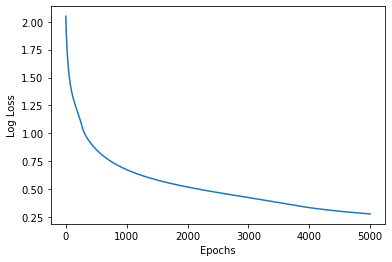

CPU times: user 14 s, sys: 46 ms, total: 14 s
Wall time: 14 s


In [ ]:
%%time
ffnvv.fit(x_train,y_oh_train, epochs=5000,learning_rate=0.05)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


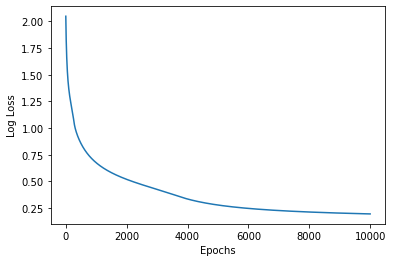

In [ ]:
ffnvv2=FFMulticlassVectorised_2(w1,w2)
ffnvv2.fit(x_train,y_oh_train,epochs=10000,learning_rate=0.05)

In [ ]:
y_pred_train=ffnvv2.predict(x_train)
y_pred_train=np.argmax(y_pred_train,1)
accuracy_train=accuracy_score(y_pred_train, y_train)
y_pred_test=ffnvv2.predict(x_test)
y_pred_test=np.argmax(y_pred_test,1)
accuracy_test=accuracy_score(y_pred_test, y_test)
print("Training Accuracu : {} and Testing Accuracy : {}".format(accuracy_train,accuracy_test))

Training Accuracu : 0.9433333333333334 and Testing Accuracy : 0.92


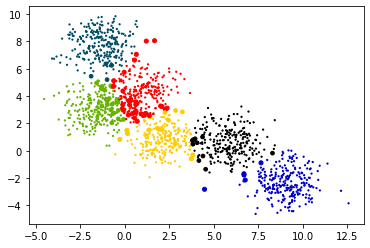

In [ ]:
plt.scatter(x_train[:,0],x_train[:,1], c=y_pred_train, cmap=my_cmap,s=15*(np.abs(np.sign(y_train-y_pred_train)+0.1)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


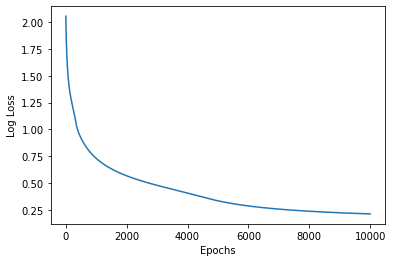

In [ ]:

ffnvv2.fit(x_train,y_oh_train, epochs=10000, learning_rate=0.04)


In [ ]:
y_pred_train=ffnvv2.predict(x_train)
y_pred_train=np.argmax(y_pred_train,1)
accuracy_train=accuracy_score(y_pred_train, y_train)
y_pred_test=ffnvv2.predict(x_test)
y_pred_test=np.argmax(y_pred_test,1)
accuracy_test=accuracy_score(y_pred_test, y_test)
print("Training Accuracu : {} and Testing Accuracy : {}".format(accuracy_train,accuracy_test))

Training Accuracu : 0.942 and Testing Accuracy : 0.916


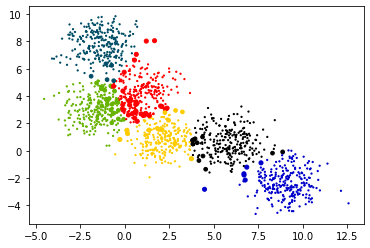

In [ ]:
plt.scatter(x_train[:,0],x_train[:,1], c=y_pred_train, cmap=my_cmap,s=15*(np.abs(np.sign(y_train-y_pred_train)+0.1)))

In [ ]:
1**2**3

1

In [ ]:
t=(1,)+(1,)
t+=t
print(len(t))

4


In [ ]:
def fun(x,y,z):
  return x+2*y+3*z
fun(0,z=1,y=3)

9

In [ ]:
def fun(x):
  if(x%2==0):
    return 1
  else:
    return
print(fun(fun(2))+1)

TypeError: ignored

In [ ]:
def fun():
  print(a+1, end="")
a=1
fun()
print(a)

21


In [ ]:
1^0

1

In [ ]:
len([i for i in range(-1,-2)])

0

In [ ]:
d={}
d['1']=(1,2)
d['2']=(2,1)
for i in d.keys():
  print(d[i][1],end='')

21

In [ ]:
def f(a,b):
  return b**a
f(b=2,2)

SyntaxError: ignored

In [ ]:
nums=[1,2,3]
vals=nums
del vals[:]
print(len(nums), len(vals))

0 0


In [1]:
try:
  raise Exception
except BaseException:
  print('A')
except Exception:
  print('B')
except:
  print("C")

A


In [2]:
def o(p):
  def q():
    return '*' * p
  return q
r=o(1)
s=o(2)
print(r()+s())

***


In [4]:
class A:
  def __init__(self):
    pass
o=A(1)
print(hasattr(a,'A'))


TypeError: ignored

In [5]:
def a(n):
  s='+'
  for i in range(n):
    s+=s
    yield s
for x in a(2):
  print(x , end='')

++++++

In [6]:
float("1.3")

1.3

In [8]:
try:
  raise Exception
except:
  print('c')

except BaseException:
  print('a')
except Exception:
  print('b')

SyntaxError: ignored

In [9]:
print(__name__)

__main__


In [10]:
class A:
  A=1
  def __init__(self):
    self.a=0
print(hasattr(A,'a'))

False


In [11]:
q=s.read(1)

AttributeError: ignored

In [13]:
def a(n):
  def b():
    return n+n
  return b
x=a('x')
y=a('')
print(x()+y())

xx


In [15]:
x='\'
print(len(x))

SyntaxError: ignored

In [16]:
def o(a,b):
  return a+b
print(o(a=1,2))

SyntaxError: ignored

In [17]:
t=(1,)
t=t[0]+t[0]
print(t)

2


In [18]:
len((1,))

1

In [20]:
def o(d,k,v):
  d[k]=v
dc={}
o(dc,'1','v')

In [21]:
lt=[1,2,3,4]
lt=list(map(lambda x:2*x,l))
print(lt)

NameError: ignored

In [22]:
1+1//2+1/2+2

3.5

In [23]:
str='abcdef'
del str[2]
str

TypeError: ignored

In [24]:
x=""""
"""
len(x)

2

In [25]:
class A:
  def __init__(self):
    pass
  def a(self):
    return 1
  def b():
    return self.a()
m=A()
m.b()

TypeError: ignored